Ignacio Vellido Expósito

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Prueba las siguientes ideas, recoge qué resultados te generan, observa cuál es su efecto y saca conclusiones (se recomienda construir una tabla de resultados donde finalmente se recoja toda la información asociada a la red y a los resultados obtenidos, y así se puedan derivar de ella las conclusiones)

# Parte 1

1. Usaste 1 capa oculta. Intenta usar 2 o 3 capas ocultas;
2. Usa capas con más o menos unidades ocultas; 
3. Cambia la función de activación en los casos anteriores. En lugar de relu, intente usar la tanh función de activación y vea cuál es el resultado. Coméntalo.

## Tabla de resultados


_  | Precision | Recall    | F1 | Kappa |

Base | 0.99811 | 0.98694 | 0.99249 | 0.90014 |

1____| 0.99431 | 0.97947 | 0.98684 | 0.98250 | Base con 3 capas

2____| 0.99253 | 0.99253 | 0.99253 | 0.99005 | Base con 4 unidades

3____| 0.99437 | 0.98880 | 0.99158 | 0.98878 | Base con tanh

4____| 0.99436 | 0.98694 | 0.99063 | 0.98753 | 1 con tanh

5____| 0.98701 | 0.99253 | 0.98976 | 0.98634 | 2 con tanh

## Conclusiones
 
- Más capas implica ampliar el espacio de búsqueda.

- Más unidades en las capas implica aumentar el grado de la función lineal que es capaz de modelar una capa densa.

- Vemos que tras reducir el número de unidades en el modelo 2 el empeoramiento en accuracy es minúsculo (incluso aumenta el F1 score), esto nos dice que el modelo ya de por sí es lo suficientemente potente. Ampliar las capas o el número de unidades fomenta el sobreaprendizaje y obligaría a usar técnicas de regularización más agresivas.

- Viendo los resultados en general es muy probable que el problema sea demasiado sencillo para una red neuronal. Un método más simple podría ser más apropiado de usar.

- El uso de una función de activación u otra debería depender de la arquitectura. El gradiente de una función ReLU es más simple de calcular pero en modelos pequeños puede no ser relevante. Por otro lado, con el uso tanh se debe tener en cuenta de que las derivadas en los extremos son muy pequeñas y el gradiente puede dejar de converger.

- En este problema el uso de tanh como función no lineal no afecta en gran medida, y los empeoramientos en resultados son demasiado pequeños para determinar que es inferior a ReLU.

In [ ]:
################################################################################
# Libraries
################################################################################

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import layers
from keras import Sequential
from keras.layers import Dense

# Import the metrics from `sklearn.metrics`
from sklearn.metrics import (confusion_matrix, 
                            precision_score, 
                            recall_score, 
                            f1_score, 
                            cohen_kappa_score)

################################################################################

# Basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
################################################################################
# Load data
################################################################################

# Read in white wine data 
white = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tsc/winequality-white.csv', sep=';')

# Read in red wine data 
red = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tsc/winequality-red.csv', sep=';')

In [ ]:
################################################################################
# Data visualization
################################################################################

# Print info on white wine
print(white.info())

# Print info on red wine
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column   

In [ ]:
# First rows of `red` 
print(red.head())

# Last rows of `white`
print(white.tail())

# Take a sample of 5 rows of `red`
print(red.head(5))

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
4893            6.2              0.21         0.29  ...       0.50     11.2        6
4894            6.6              0.32         0.36  ...       0.46      9.6        5
4895            6.5              0.24         0.19  ...       0.46      9.4        6
4896            5.5              0.29         0.30  ...       0.38     12.8        7
4897            6.0              0.21         0.38  ...     

In [ ]:
# Describe `white`
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
# Double check for null values in `red`
nulls = red.isnull().sum(axis=1).tolist()
len([x for x in nulls if x > 0])

0

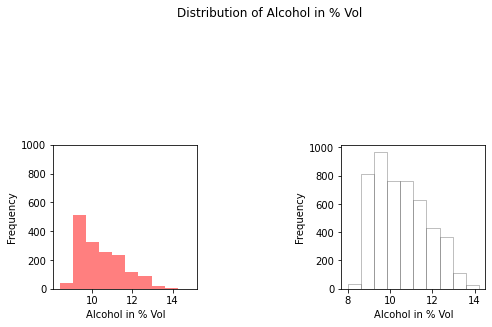

In [ ]:
################################################################################
# Visualize data
################################################################################

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

In [ ]:
print(np.histogram(red.alcohol, bins=[7,8,9,10,11,12,13,14,15]))
print(np.histogram(white.alcohol, bins=[7,8,9,10,11,12,13,14,15]))

(array([  0,   7, 673, 452, 305, 133,  21,   8]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))
(array([   0,  317, 1606, 1256,  906,  675,  131,    7]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))


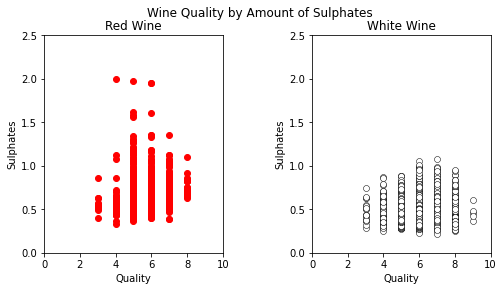

In [ ]:
#SULFATOS
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

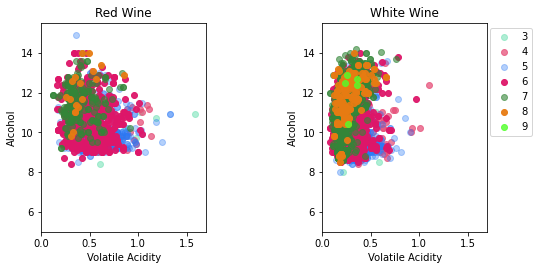

In [ ]:
#ACIDEZ
np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, color=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, color=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
#ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

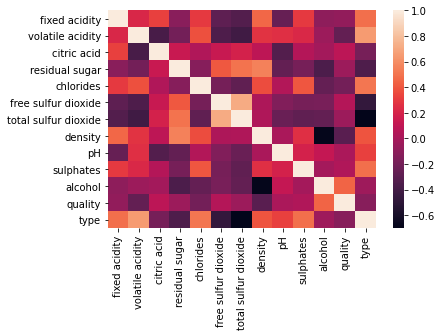

In [ ]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
################################################################################
# Train-test split
################################################################################

# Specify the data
X=wines.iloc[:,0:11]

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)

print(y_test)
X_test

[0 1 0 ... 0 0 1]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4708,6.9,0.30,0.36,4.50,0.054,31.0,203.0,0.99513,3.40,0.57,10.4
968,9.0,0.40,0.43,2.40,0.068,29.0,46.0,0.99430,3.20,0.60,12.2
1948,7.6,0.17,0.45,11.20,0.054,56.0,137.0,0.99700,3.15,0.47,10.0
4805,6.6,0.29,0.39,6.75,0.031,22.0,98.0,0.99130,3.15,0.80,12.9
2126,6.1,0.28,0.22,1.80,0.034,32.0,116.0,0.98980,3.36,0.44,12.6
...,...,...,...,...,...,...,...,...,...,...,...
5300,6.6,0.26,0.22,18.15,0.050,23.0,139.0,0.99904,3.06,0.50,9.2
1961,6.8,0.15,0.30,5.30,0.050,40.0,127.0,0.99420,3.40,0.39,9.7
3942,6.7,0.17,0.27,1.40,0.032,39.0,149.0,0.99254,3.40,0.52,10.5
2066,6.8,0.32,0.21,2.20,0.044,15.0,68.0,0.99320,3.17,0.39,9.4


In [ ]:
################################################################################
# Preprocessing data
################################################################################

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [ ]:
################################################################################
# Define model
################################################################################

# Initialize the constructor
model = Sequential(
    [
        Dense(12, activation='relu', input_shape=(11,)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
################################################################################
# Fit model
################################################################################

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train,epochs=5, batch_size=1, verbose=1)

Epoch 1/5
4352/4352 [==============================] - 6s 1ms/step - loss: 0.1755 - accuracy: 0.9318
Epoch 2/5
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0379 - accuracy: 0.9919
Epoch 3/5
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0218 - accuracy: 0.9961
Epoch 4/5
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0165 - accuracy: 0.9964
Epoch 5/5
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0127 - accuracy: 0.9980


In [ ]:
################################################################################
# Test model
################################################################################

score = model.evaluate(X_test, y_test, verbose=1)

y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

print(y_pred[:5])
print(score)

68/68 [==============================] - 0s 987us/step - loss: 0.0199 - accuracy: 0.9963
[[False]
 [ True]
 [False]
 [False]
 [False]]
[0.01986503042280674, 0.9962704181671143]


In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Precision 
print("Precision: {}".format(precision_score(y_test, y_pred)))

# Recall
print("Recall:    {}".format(recall_score(y_test, y_pred)))

# F1 score
print("F1 score:  {}".format(f1_score(y_test,y_pred)))

# Cohen's kappa
print("Kappa:     {}".format(cohen_kappa_score(y_test, y_pred)))

[[1608    1]
 [   7  529]]
Precision: 0.9981132075471698
Recall:    0.9869402985074627
F1 score:  0.9924953095684803
Kappa:     0.9900140245925012


---
- Usaste 1 capa oculta. Intenta usar 2 o 3 capas ocultas;

In [ ]:
################################################################################
# Define model
################################################################################

# Initialize the constructor
model = Sequential(
    [
        Dense(12, activation='relu', input_shape=(11,)),
        Dense(8, activation='relu'),
        Dense(8, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)

# Model summary
model.summary()

################################################################################
# Fit model
################################################################################

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train,epochs=5, batch_size=1, verbose=1)

################################################################################
# Test model
################################################################################

score = model.evaluate(X_test, y_test, verbose=1)

y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

print("___________________\nScore: ")
print(score)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Precision 
print("Precision: {}".format(precision_score(y_test, y_pred)))

# Recall
print("Recall:    {}".format(recall_score(y_test, y_pred)))

# F1 score
print("F1 score:  {}".format(f1_score(y_test,y_pred)))

# Cohen's kappa
print("Kappa:     {}".format(cohen_kappa_score(y_test, y_pred)))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 12)                144       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
4352/4352 [==============================] - 6s 1ms/step - loss: 0.2307 - accuracy: 0.9211
Epoch 2/5
4352/4352 [

---
- Usa capas con más o menos unidades ocultas; 

In [ ]:
################################################################################
# Define model
################################################################################

# Initialize the constructor
model = Sequential(
    [
        Dense(12, activation='relu', input_shape=(11,)),
        Dense(4, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)

# Model summary
model.summary()

################################################################################
# Fit model
################################################################################

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train,epochs=5, batch_size=1, verbose=1)

################################################################################
# Test model
################################################################################

score = model.evaluate(X_test, y_test, verbose=1)

y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

print("___________________\nScore: ")
print(score)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Precision 
print("Precision: {}".format(precision_score(y_test, y_pred)))

# Recall
print("Recall:    {}".format(recall_score(y_test, y_pred)))

# F1 score
print("F1 score:  {}".format(f1_score(y_test,y_pred)))

# Cohen's kappa
print("Kappa:     {}".format(cohen_kappa_score(y_test, y_pred)))

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 12)                144       
_________________________________________________________________
dense_64 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 5         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
4352/4352 [==============================] - 6s 1ms/step - loss: 0.1962 - accuracy: 0.9377
Epoch 2/5
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0255 - accuracy: 0.9950
Epoch 3/5
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0219 - accuracy: 0.9971
Epoch 4/5
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0189 

---
- Cambia la función de activación en los casos anteriores. En lugar de relu, intente usar la tanh función de activación y vea cuál es el resultado. Coméntalo.

In [ ]:
################################################################################
# Define model
################################################################################

# Initialize the constructor
model = Sequential(
    [
        Dense(12, activation='tanh', input_shape=(11,)),
        Dense(8, activation='tanh'),
        Dense(1, activation='sigmoid')
    ]
)

# Model summary
model.summary()

################################################################################
# Fit model
################################################################################

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train,epochs=5, batch_size=1, verbose=1)

################################################################################
# Test model
################################################################################

score = model.evaluate(X_test, y_test, verbose=1)

y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

print("___________________\nScore: ")
print(score)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Precision 
print("Precision: {}".format(precision_score(y_test, y_pred)))

# Recall
print("Recall:    {}".format(recall_score(y_test, y_pred)))

# F1 score
print("F1 score:  {}".format(f1_score(y_test,y_pred)))

# Cohen's kappa
print("Kappa:     {}".format(cohen_kappa_score(y_test, y_pred)))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 12)                144       
_________________________________________________________________
dense_67 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
4352/4352 [==============================] - 5s 1ms/step - loss: 0.1510 - accuracy: 0.9605
Epoch 2/5
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0230 - accuracy: 0.9958
Epoch 3/5
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0227 - accuracy: 0.9940
Epoch 4/5
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0194 

In [ ]:
################################################################################
# Define model
################################################################################

# Initialize the constructor
model = Sequential(
    [
        Dense(12, activation='tanh', input_shape=(11,)),
        Dense(8, activation='tanh'),
        Dense(8, activation='tanh'),
        Dense(8, activation='tanh'),
        Dense(1, activation='sigmoid')
    ]
)

# Model summary
model.summary()

################################################################################
# Fit model
################################################################################

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train,epochs=5, batch_size=1, verbose=1)

################################################################################
# Test model
################################################################################

score = model.evaluate(X_test, y_test, verbose=1)

y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

print("___________________\nScore: ")
print(score)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Precision 
print("Precision: {}".format(precision_score(y_test, y_pred)))

# Recall
print("Recall:    {}".format(recall_score(y_test, y_pred)))

# F1 score
print("F1 score:  {}".format(f1_score(y_test,y_pred)))

# Cohen's kappa
print("Kappa:     {}".format(cohen_kappa_score(y_test, y_pred)))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 12)                144       
_________________________________________________________________
dense_70 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_71 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_72 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 9         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0863 - accuracy: 0.9785
Epoch 2/5
4352/4352 

In [ ]:
################################################################################
# Define model
################################################################################

# Initialize the constructor
model = Sequential(
    [
        Dense(12, activation='tanh', input_shape=(11,)),
        Dense(4, activation='tanh'),
        Dense(1, activation='sigmoid')
    ]
)

# Model summary
model.summary()

################################################################################
# Fit model
################################################################################

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train,epochs=5, batch_size=1, verbose=1)

################################################################################
# Test model
################################################################################

score = model.evaluate(X_test, y_test, verbose=1)

y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

print("___________________\nScore: ")
print(score)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Precision 
print("Precision: {}".format(precision_score(y_test, y_pred)))

# Recall
print("Recall:    {}".format(recall_score(y_test, y_pred)))

# F1 score
print("F1 score:  {}".format(f1_score(y_test,y_pred)))

# Cohen's kappa
print("Kappa:     {}".format(cohen_kappa_score(y_test, y_pred)))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 12)                144       
_________________________________________________________________
dense_75 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 5         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
4352/4352 [==============================] - 5s 1ms/step - loss: 0.1848 - accuracy: 0.9435
Epoch 2/5
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0274 - accuracy: 0.9941
Epoch 3/5
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0258 - accuracy: 0.9953
Epoch 4/5
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0305 

---
# Parte 2

Toma la columna quality como las etiqueta objetivo, transformando ahora el problema a un problema multiclase. Aplica lo aprendido y extrae resultados y conclusiones

In [ ]:
################################################################################
# Train-test split
################################################################################

wines = red.append(white, ignore_index=True)
# wines.quality -= 3

# Specify the data
X=wines.iloc[:,0:11]

# Specify the target labels and flatten the array 
y=wines.iloc[:,11]

output_size = 11 # 0...10 possible reviews

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

################################################################################
# Preprocessing data
################################################################################

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

print(X)
print(y)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4              0.70         0.00  ...  3.51       0.56      9.4
1               7.8              0.88         0.00  ...  3.20       0.68      9.8
2               7.8              0.76         0.04  ...  3.26       0.65      9.8
3              11.2              0.28         0.56  ...  3.16       0.58      9.8
4               7.4              0.70         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
6492            6.2              0.21         0.29  ...  3.27       0.50     11.2
6493            6.6              0.32         0.36  ...  3.15       0.46      9.6
6494            6.5              0.24         0.19  ...  2.99       0.46      9.4
6495            5.5              0.29         0.30  ...  3.34       0.38     12.8
6496            6.0              0.21         0.38  ...  3.26       0.32     11.8

[6497 rows x 11

In [ ]:
set(wines.quality)

{3, 4, 5, 6, 7, 8, 9}


Proceso:

1. Se empieza buscando una arquitectura que genere underfitting
2. Se mejora la arquitectura hasta tener overfitting, indicando que es lo suficientemente potente para los datos que contamos.
  - Ya el Dense con 8 unidades es demasiado para el problema, hace overfitting instantaneo.
  - La función de pérdida decrementa muy despacio, se prueba aumentando el learning rate.
  - No llega a decrementar, se aumenta batch_size.
3. Se regulariza para evitar el sobreajuste.

In [ ]:
# Comparing model with a simple RF
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.69

In [ ]:
################################################################################
# Define model
################################################################################

from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Initialize the constructor
model = Sequential(
    [
      Dense(12, activation='relu', input_shape=(11,)),
      Dense(8, activation='relu'),
      Dense(8, activation='relu'),
      Dense(8, activation='relu'),
      # Dropout(0.5),
      # Dense(8, activation='relu'),
      Dropout(0.25),
      Dense(output_size, activation='softmax')
    ]
)

# Model summary
model.summary()

################################################################################
# Fit model
################################################################################

# Parameters
batch_size = 1
epochs = 100
lr = 1e-2

opt = Adam(lr=lr)

# Compile model
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_callback = EarlyStopping(monitor='accuracy', 
                               patience=3,
                               restore_best_weights=True)

model.fit(X_train, 
          y_train,
          epochs=epochs,
          batch_size=batch_size,
          validation_split=0.1,
          shuffle=True,
          callbacks=[early_callback],
          verbose=1)

################################################################################
# Test model
################################################################################

print("_______________________________\nEvaluate model: ")
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

print("\nLoss: {} \nAccuracy: {}".format(loss, accuracy))

# Confusion matrix
labels = list(range(0,11))
conf = confusion_matrix(y_test, y_pred, labels=labels)
df_cm = pd.DataFrame(conf, index=labels, columns=labels)
df_cm

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 12)                144       
_________________________________________________________________
dense_139 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_140 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_141 (Dense)            (None, 8)                 72        
_________________________________________________________________
dropout_12 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_142 (Dense)            (None, 11)                99        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_______________________________________________________

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,3,3,0,0,0,0
4,0,0,0,0,0,27,10,1,0,0,0
5,0,0,0,0,0,329,132,4,0,0,0
6,0,0,0,0,0,155,332,44,0,0,0
7,0,0,0,0,0,9,134,77,0,0,0
8,0,0,0,0,0,1,20,17,0,0,0
9,0,0,0,0,0,0,1,1,0,0,0


Conclusiones:
- Es un problema con 11 clases (0 al 10) donde solo contamos con datos de 6 de ellas. Esto hace que resulte complicado que aprenda a generalizar, puesto que una red lo suficientemente potente es propensa a aprender la ausencia de estos datos.
- Una regularización fuerte por el contrario hace que luego en test los resultados sean pobres, puesto que la distribución que tienen no representa la real del problema.
- Comparando con un modelo simple de Random Forest, los resultados son significativamente inferiores.